In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version:  0.0.20


In [3]:
from lmfit import *

In [4]:
x_data,y_data=(array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
         -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
         -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
          2.63157895,   3.68421053,   4.73684211,   5.78947368,
          6.84210526,   7.89473684,   8.94736842,  10.        ]),
 array([ 84.5439605 ,  79.96429095,  53.29446178,  15.49595419,
         55.59294258,  57.74976334, -17.47795207,  19.03107704,
        -31.19976545, -10.54910001,  17.56865009,   5.42434731,
         -9.60203555,  21.4654494 ,  44.94972133,   6.80172884,
         62.75223289,  58.16212626, 111.04251023,  83.52494712]))

In [49]:
def quad(x,a=1,b=1,c=1):
    return a*x**2 + b*x + c

def quadt(t,a=1,b=1,c=1):
    return a*t**2 + b*t + c

In [50]:
model=Model(quadt)   # from lmfit
params=model.make_params()

In [51]:
params['a']=Parameter("a",min=0,value=0.5)

In [52]:
results = model.fit(y_data, params, t=x_data,method="powell")

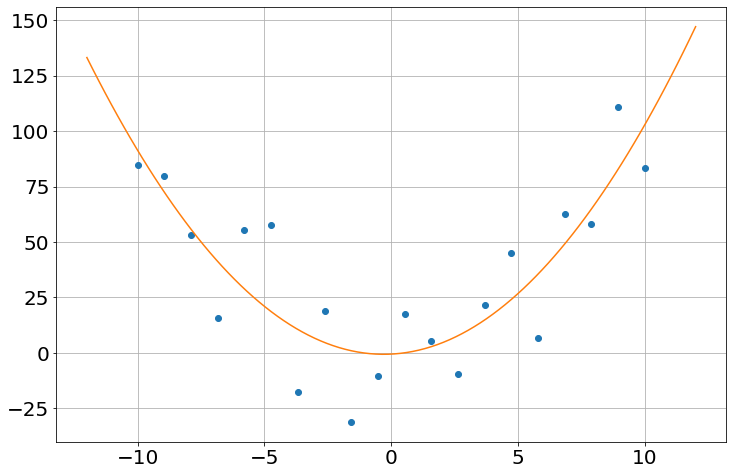

In [53]:
plot(x_data,y_data,'o')

x=linspace(-12,12,100)
y=results.eval(t=x)
plot(x,y,'-')

In [54]:
def run_sim_monte_carlo(x,results,σ=1,color='b',N=300):
    from copy import deepcopy
    
    work_results=deepcopy(results)
    D={}
    for key in results.params:
        D[key]=results.params[key].value

    xvarname=list(results.userkws.keys())[0]
    
    y=work_results.eval(**D,**{xvarname:x})
    plot(x,y,color+'-')

    for i in range(N):
        D={}
        work_results=deepcopy(results)
        
        for key in results.params:
            D[key]=results.params[key].value+randn()*results.params[key].stderr*σ

        y=work_results.eval(**D,**{xvarname:x})
        plot(x,y,color+'-',alpha=0.01)



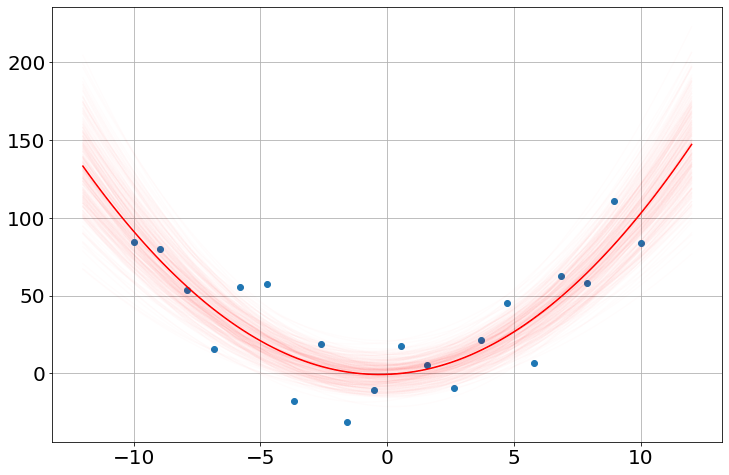

In [55]:
plot(x_data,y_data,'o')

x=linspace(-12,12,100)
run_sim_monte_carlo(x,results,σ=1,color='r')